In [2]:

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
# Function to filter 'OG6' substrings
def filter_og6(content):
    return ' '.join(re.findall(r'OG6_\d+', content))

In [4]:
compotabfin = pd.read_csv('scere_complexes_ortho.tsv', sep='\t')
compotab_auris = pd.read_csv('scere_complexes_ortho.tsv', sep='\t')
compotab_albicans = pd.read_csv('scere_complexes_ortho.tsv', sep='\t')
compotab_hae = pd.read_csv('scere_complexes_ortho.tsv', sep='\t')

In [5]:
compotabfin['Participants'] = compotabfin['Participants'].apply(filter_og6)
compotab_auris['Participants'] = compotab_auris['Participants'].apply(filter_og6)
compotab_albicans['Participants'] = compotab_albicans['Participants'].apply(filter_og6)
compotab_hae['Participants'] = compotab_hae['Participants'].apply(filter_og6)

In [6]:
calbicans_orth = pd.read_csv('DB/calbicans_orthomcl_uniprot_SC5314_locked.tsv', sep='\t')
chae_orth =  pd.read_csv('DB/chae_orthomcl_uniprot_locked.tsv', sep='\t')
cauris_orth= pd.read_csv('DB/cauris_orthomcl_uniprot_locked.tsv', sep='\t')

In [7]:
auris_orthomcllist= cauris_orth['Orthomcl ID'].tolist()
albicans_orthomcllist= calbicans_orth['Orthomcl ID'].tolist()
hae_orthomcllist= chae_orth['Orthomcl ID'].tolist()

In [8]:
entries_set =  set(hae_orthomcllist)

In [9]:

# Define a function to calculate the length of the intersection between sets
def length_of_intersection(column_entry):
    # Split the column entry by space to create a set of elements
    elements_set = set(column_entry.split())
    # Calculate the intersection and return its length
    intersection_length = len(elements_set.intersection(entries_set))
    return intersection_length
#return the intersection

In [10]:

# Define a function to calculate the length of the intersection between sets
def intersection(column_entry, entries_set_intersection):
    # Split the column entry by space to create a set of elements
    elements_set = set(column_entry.split())
    # Calculate the intersection and return its length
    intersection =elements_set.intersection(entries_set_intersection)
    difference = elements_set- intersection
    return intersection, len(intersection), difference
#return the intersection

In [11]:
entries_set_intersection = auris_orthomcllist

In [15]:
for c in compotab_albicans.Participants.values:
    print(intersection(c,albicans_orthomcllist))

(set(), 0, {'OG6_500431', 'OG6_500635', 'OG6_500059'})
({'OG6_101316', 'OG6_102423'}, 2, {'OG6_500395'})
({'OG6_100753', 'OG6_103514', 'OG6_104156', 'OG6_102948', 'OG6_102452', 'OG6_102349', 'OG6_101868'}, 7, {'OG6_102613', 'OG6_102196', 'OG6_101966', 'OG6_102085', 'OG6_500954', 'OG6_500388', 'OG6_102296', 'OG6_102408', 'OG6_102323'})
({'OG6_102771', 'OG6_103012'}, 2, {'OG6_101597', 'OG6_103409', 'OG6_103447', 'OG6_102118', 'OG6_102418', 'OG6_102392'})
({'OG6_100305', 'OG6_102752', 'OG6_102682', 'OG6_102616', 'OG6_103136', 'OG6_102786', 'OG6_101765', 'OG6_102452', 'OG6_102771', 'OG6_103596', 'OG6_101868', 'OG6_102494', 'OG6_102378'}, 13, {'OG6_102613', 'OG6_102797', 'OG6_102196', 'OG6_101597', 'OG6_111911', 'OG6_101116', 'OG6_102085', 'OG6_103447', 'OG6_103409', 'OG6_134872', 'OG6_102118', 'OG6_102418', 'OG6_102392', 'OG6_500174', 'OG6_102408', 'OG6_102323'})
({'OG6_102631', 'OG6_102158', 'OG6_102431', 'OG6_103002', 'OG6_102421', 'OG6_100753', 'OG6_101374', 'OG6_102452', 'OG6_102282', 

In [63]:
intersection(compotab_albicans, albicans_orthomcllist) 

AttributeError: 'DataFrame' object has no attribute 'split'

In [41]:
set1= set(["A", "B", "C"])
set2= set(["A", "C", "D"])

In [44]:
set1.intersection(set2)

{'A', 'C'}

In [45]:
set1.difference(set2)

{'B'}

In [46]:
set2.difference(set1)

{'D'}

In [43]:
intersection(set1)

AttributeError: 'set' object has no attribute 'split'

In [12]:
compotab_auris['Participants_Length'] = compotab_auris['Participants'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)
compotab_albicans['Participants_Length'] = compotab_albicans['Participants'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)
compotab_hae['Participants_Length'] = compotab_hae['Participants'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)

In [13]:
# Apply the function to each row in the specified column and create a new column with the results
compotab_hae['Participants found in our data'] = compotab_hae['Participants'].apply(length_of_intersection)

In [22]:
compotab_albicans

,Recommended name,Participants,Participants_Length,Participants found in our data
0,CST complex,OG6_500431 OG6_500059 OG6_500635,3,0
1,Replication protein A complex,OG6_101316 OG6_102423 OG6_500395,3,2
2,U1 small nuclear ribonucleoprotein complex,OG6_100753 OG6_101966 OG6_104156 OG6_101868 OG...,17,12
3,U6 small nuclear ribonucleoprotein complex,OG6_103409 OG6_102392 OG6_103447 OG6_102771 OG...,8,8
4,U4/U6.U5 tri-small nuclear ribonucleoprotein c...,OG6_102682 OG6_102752 OG6_102378 OG6_100305 OG...,29,26
...,...,...,...,...
623,Mitochondrial proton-transporting ATP synthase...,OG6_100608 OG6_102362 OG6_137875 OG6_111834 OG...,17,16
624,Nucleolar ribonuclease MRP complex,OG6_103583 OG6_131696 OG6_152915 OG6_101654 OG...,10,6
625,PAN2-PAN3 mRNA deadenylation complex,OG6_103887 OG6_102772,2,2
626,FUN30 complex,OG6_103309,1,1


In [14]:
compotab_hae.to_csv('scere_filteredcomplexes_comparedto_haeorth.tsv', sep='\t', index=False)

In [15]:
compotab1fin = pd.read_csv('scere_filteredcomplexes_comparedto_aurisorth.tsv', sep='\t')
compotab2fin = pd.read_csv('scere_filteredcomplexes_comparedto_albicansorth.tsv', sep='\t')
compotab3fin = pd.read_csv('scere_filteredcomplexes_comparedto_haeorth.tsv', sep='\t')

In [16]:
compotab1fin['Participants found in our data'] = pd.to_numeric(compotab1fin['Participants found in our data'], errors='coerce')
compotab1fin['Participants_Length'] = pd.to_numeric(compotab1fin['Participants_Length'], errors='coerce')
compotab2fin['Participants found in our data'] = pd.to_numeric(compotab2fin['Participants found in our data'], errors='coerce')
compotab2fin['Participants_Length'] = pd.to_numeric(compotab2fin['Participants_Length'], errors='coerce')
compotab3fin['Participants found in our data'] = pd.to_numeric(compotab3fin['Participants found in our data'], errors='coerce')
compotab3fin['Participants_Length'] = pd.to_numeric(compotab3fin['Participants_Length'], errors='coerce')

In [17]:
#calculate the ratios of numbers to complete
compotab1fin['ratio'] = compotab1fin['Participants found in our data'] / compotab1fin['Participants_Length']
compotab2fin['ratio'] = compotab2fin['Participants found in our data'] / compotab2fin['Participants_Length']
compotab3fin['ratio'] = compotab3fin['Participants found in our data'] / compotab3fin['Participants_Length']

In [31]:
len(compotab1fin[compotab1fin['ratio'] >= 0.75])

411

In [32]:
len(compotab2fin[compotab2fin['ratio'] >= 0.75])

386

In [33]:
len(compotab3fin[compotab3fin['ratio'] >= 0.75])

373

In [34]:
len(compotab1fin[compotab1fin['ratio'] >= 0.5])

555

In [35]:
len(compotab2fin[compotab2fin['ratio'] >= 0.5])

558

In [36]:
len(compotab3fin[compotab3fin['ratio'] >= 0.5])

543

In [37]:
len(compotab1fin[compotab1fin['ratio'] >= 0.9])

340

In [38]:
len(compotab2fin[compotab2fin['ratio'] >= 0.9])

321

In [39]:
len(compotab3fin[compotab3fin['ratio'] >= 0.9])

283

In [40]:
len(compotab1fin[compotab1fin['ratio'] == 1])

331

In [41]:
len(compotab2fin[compotab2fin['ratio'] == 1])

313

In [42]:
len(compotab3fin[compotab3fin['ratio'] == 1])

278

In [43]:
len(compotab1fin[compotab1fin['ratio'] >= 0.1])

591

In [44]:
len(compotab2fin[compotab2fin['ratio'] >= 0.1])

599

In [45]:
len(compotab3fin[compotab3fin['ratio'] >= 0.1])

579

In [145]:
compotab.to_csv('scere_complexes_comparedto_concat.tsv', sep='\t', index=False)

In [18]:
compotab.drop(columns=['Intersection_Length'], inplace=True)

NameError: name 'compotab' is not defined

In [245]:
completecomplexes= compotab3fin[compotab3fin['Participants found in our data'] ==compotab3fin['Participants_Length']]

In [246]:
completecomplexes.to_csv('scere_complexes_comparedto_chaeorth_onlycompletecomplexes.tsv', sep='\t', index=False)

In [200]:
complexes_testrain=compotabfin.drop(columns=['Recommended name','Participants_Length','Participants found in our data' ])

In [24]:
complexes_testrain.to_csv('complexes_testtrain.csv')

NameError: name 'complexes_testrain' is not defined

In [190]:
file1=pd.read_csv('complexportal_scere_tab.tsv', sep='\t')

In [173]:
compotab

,Recommended name,Participants
0,CST complex,P32797|P38960|Q07921
1,Replication protein A complex,P22336|P26754|P26755
2,U1 small nuclear ribonucleoprotein complex,P32605|P33203|P39682|P40018|P40204|P43321|P532...
3,U6 small nuclear ribonucleoprotein complex,P38203|P40070|P40089|P47093|P49960|P53905|P577...
4,U4/U6.U5 tri-small nuclear ribonucleoprotein c...,P19735|P20053|P23394|P32639|P33334|P36048|P382...
...,...,...
623,Mitochondrial proton-transporting ATP synthase...,P00830|P00854|P00856|P05626|P07251|P09457|P213...
624,Nucleolar ribonuclease MRP complex,P28005|P38208|P38291|P38336|P38786|P40993|P418...
625,PAN2-PAN3 mRNA deadenylation complex,P36102|P53010
626,FUN30 complex,P31380


In [21]:
testtrain = pd.read_csv('scere_complexes_ortho.tsv', sep='\t')

In [22]:
testtrain.sort(length)

AttributeError: 'DataFrame' object has no attribute 'sort'

In [134]:
testtrain['Participants'] = testtrain['Participants'].apply(filter_og6)

In [142]:
testtrain.columns

Index(['Recommended name', 'Participants'], dtype='object')

In [23]:
testtrain.drop(columns=[0], inplace=True)

KeyError: '[0] not found in axis'

In [ ]:
testtrain

In [24]:
testtrain = testtrain.drop(index=testtrain.index[0])

In [25]:
testtrain = testtrain.reset_index(drop=True)


In [106]:
test1= pd.read_csv('filtered_onlyOG6_testtrain_complexes.csv')

In [108]:
test1 = test1.rename(columns=['filtered_Participants','Participants'])

TypeError: 'list' object is not callable

In [137]:
testtrain.to_csv('filtered_onlyOG6_scere_complexes.tsv', sep='\t')

In [32]:
CaurisSEC_Extractfeatures = pd.read_csv('DB/Cauris_orthomcl_SEC_20230929.tsv', sep='\t')

In [ ]:
CaurisSEC_Extractfeatures

In [26]:
complexes= pd.read_csv('scere_filteredcomplexes_comparedto_albicansorth.tsv', sep='\t')

In [27]:
complexes.columns

Index(['Recommended name', 'Participants', 'Participants_Length',
       'Participants found in our data'],
      dtype='object')

In [29]:
highparticipants = complexes[complexes['Participants_Length'] > 30]

In [30]:
highparticipants

,Recommended name,Participants,Participants_Length,Participants found in our data
278,54S mitochondrial large ribosomal subunit,OG6_102773 OG6_101181 OG6_114551 OG6_127201 OG...,46,43
279,37S mitochondrial small ribosomal subunit,OG6_110914 OG6_500400 OG6_115955 OG6_102116 OG...,34,29
294,Nuclear pore complex,OG6_102783 OG6_500308 OG6_139042 OG6_500518 OG...,32,19
324,PRP19-associated complex,OG6_102364 OG6_102669 OG6_100085 OG6_102341 OG...,43,36
543,26S proteasome complex,OG6_102724 OG6_499845 OG6_102011 OG6_102240 OG...,33,33


In [19]:
filtered_df.sort(length)

NameError: name 'filtered_df' is not defined

In [193]:
size = []
complex_file_path = 'complexportal_scere_tab.tsv'

# Open and read the file line by line
with open(complex_file_path, 'r') as file:
    for line in file:
        # Split the line by tab characters and then by the pipe character
        num_participants = len(line.split('\t')[4].split('|'))
        size.append(num_participants)


In [131]:
filtered_df = compotab1fin[compotab1fin['Intersection_Length'] == len(entries_set)]

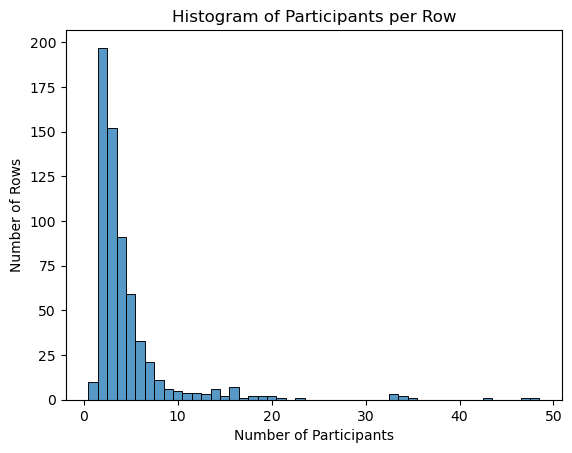

In [194]:

sns.histplot(size, discrete=True, bins=range(min(size), max(size) + 1), kde=False)
plt.xlabel('Number of Participants')
plt.ylabel('Number of Rows')
plt.title('Histogram of Participants per Row')
plt.show()